# Q1: Setup & Exploration

**Phase 1-2:** Project Setup, Data Exploration  
**Points: 6 points**

**Focus:** Load data, perform initial inspection, identify data quality issues.

**Lecture Reference:** Lecture 11, Notebook 1 ([`11/demo/01_setup_exploration_cleaning.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/01_setup_exploration_cleaning.ipynb)), Phases 1-2. Also see Lecture 04 (pandas I/O) and Lecture 07 (visualization).

---

## Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os

# Create output directory
os.makedirs('output', exist_ok=True)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

---

## Objective

Load the Chicago Beach Weather Sensors dataset, perform initial inspection, and identify data quality issues.

**Note:** The datetime column in this dataset is named `Measurement Timestamp`.

**Time Series Note:** Unlike the lecture's NYC Taxi data (event-based), this dataset is **time-series data** with continuous sensor readings. The data is already indexed by time, so you'll work with datetime-indexed dataframes throughout. See **Lecture 09** for time series operations. For time series visualizations, you may want to use pandas `resample()` to aggregate data (e.g., daily averages) for clearer visualization of long-term trends.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q1_data_info.txt`
**Format:** Plain text file
**Content:** Dataset information including:
- Dataset shape (rows × columns)
- Column names (one per line or comma-separated)
- Data types for each column
- Date range (start date and end date) - **REQUIRED if temporal data**
- Missing value counts for each column (column name: count)

**Example format:**
```
Dataset Shape: 50000 rows × 10 columns

Column Names:
- Measurement Timestamp
- Beach
- Water Temperature
- Air Temperature
...

Data Types:
- Measurement Timestamp: datetime64[ns]
- Beach: object
- Water Temperature: float64
...

Date Range:
Start: 2022-01-01 00:00:00
End: 2027-09-15 07:00:00

Missing Values:
- Water Temperature: 2500 (5.0%)
- Air Temperature: 1500 (3.0%)
...
```

### 2. `output/q1_exploration.csv`
**Format:** CSV file
**Required Columns (exact names):** `column_name`, `mean`, `std`, `min`, `max`, `missing_count`
**Content:** One row per numeric column in the dataset
- `column_name`: Name of the numeric column
- `mean`: Mean value (float)
- `std`: Standard deviation (float)
- `min`: Minimum value (float)
- `max`: Maximum value (float)
- `missing_count`: Number of missing values (integer)

**Example:**
```csv
column_name,mean,std,min,max,missing_count
Water Temperature,15.23,5.12,0.5,28.7,2500
Air Temperature,18.45,8.23,-5.2,35.8,1500
Wind Speed,6.78,4.56,0.1,25.3,0
```

### 3. `output/q1_visualizations.png`
**Format:** PNG image file
**Content:** At least 2 plots in a single figure (use subplots)
**Required plots:**
1. **Distribution plot:** Histogram or density plot of at least one numeric variable
2. **Time series plot:** Line plot showing a numeric variable over time (if temporal data)

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

---

## Requirements Checklist

- [ ] Data loaded successfully from `data/beach_sensors.csv`
- [ ] Initial inspection completed (shape, info, head, describe)
- [ ] Missing values identified and counted
- [ ] Basic visualizations created (at least 2 plots: distribution + time series)
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Load and inspect the dataset** - Use standard pandas I/O and inspection methods
2. **Parse datetime** - Identify and convert datetime column(s)
3. **Identify missing values** - Count and calculate percentages per column
4. **Create visualizations** - Distribution plot + time series plot (use subplots)
5. **Save artifacts** - Write to the three required output files

---

## Decision Points

- **Visualization choices:** What types of plots best show your data? See Lecture 11 Notebook 1 for examples.
- **Data quality assessment:** What issues do you see? Missing data patterns? Outliers? Inconsistent formats? Document these for Q2.

---

## Checkpoint

After Q1, you should have:
- [ ] Data loaded successfully
- [ ] Basic statistics calculated
- [ ] Initial visualizations created (2+ plots)
- [ ] Data quality issues identified
- [ ] All 3 artifacts saved: `q1_data_info.txt`, `q1_exploration.csv`, `q1_visualizations.png`

---

**Next:** Continue to `q2_data_cleaning.md` for Data Cleaning.


In [74]:
###1

# Load the beach sensors data

import os

data_file = 'data/beach_sensors.csv'

df_beach = pd.read_csv (data_file)

#Data Shape, Type, Columns
display("# Dataset Overview")

display (f"**Shape:** {df_beach.shape[0]:,} rows × {df_beach.shape[1]} columns")

display("Column Summary")
df_beach.info()

#for the txt file
col_summary = df_beach.dtypes.to_frame(name = "dtype")

# TODO: Convert Measurement Timestamp column to datetime
df_beach['Measurement Timestamp'] = pd.to_datetime(df_beach['Measurement Timestamp'])


#Date Range for dataset
print(f"\nDate range: {df_beach['Measurement Timestamp'].min()} to {df_beach['Measurement Timestamp'].max()}")
#Date range begins prior to the reported start date of data collection according to source website

#Missing Data by column
display("# Missing Values")

missing = df_beach.isnull().sum()
missing_pct = (missing / len(df_beach)) *100
missing_df = pd.DataFrame({
    'Missing Count' : missing, 
    'Missing %': missing_pct.round(2)
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) == 0:
    display(Markdown("**No missing values found!**"))
else:
    display(missing_df)


# Check if missing values occur in the same rows
cols_with_same_missing = ['Wet Bulb Temperature','Rain Intensity','Total Rain', 'Heading','Precipitation Type']
missing_mask = df_beach[cols_with_same_missing].isnull()
print(f"Rows where ALL are missing: {missing_mask.all(axis=1).sum():,}")
print(f"Rows where ANY is missing: {missing_mask.any(axis=1).sum():,}")
#looks like missing info is correlated

#save to txt file
with open("output/q1_data_info.txt", "w") as f:
    f.write("===Dataset Information ===\n")
    f.write(f"Dataset Shape: {df_beach.shape[0]:,} rows × {df_beach.shape[1]} columns\n")
    f.write(f"Dataset Column Names, Types: \n")
    f.write(col_summary.to_string() + "\n\n")
    f.write(f"Date Range of Dataset: {df_beach['Measurement Timestamp'].min()} to {df_beach['Measurement Timestamp'].max()} \n\n")
    f.write(f"Missing Data: {missing_df} \n")
    pass

'# Dataset Overview'

'**Shape:** 196,321 rows × 18 columns'

'Column Summary'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196321 entries, 0 to 196320
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Station Name                 196321 non-null  object 
 1   Measurement Timestamp        196321 non-null  object 
 2   Air Temperature              196246 non-null  float64
 3   Wet Bulb Temperature         120370 non-null  float64
 4   Humidity                     196321 non-null  int64  
 5   Rain Intensity               120370 non-null  float64
 6   Interval Rain                196321 non-null  float64
 7   Total Rain                   120370 non-null  float64
 8   Precipitation Type           120370 non-null  float64
 9   Wind Direction               196321 non-null  int64  
 10  Wind Speed                   196321 non-null  float64
 11  Maximum Wind Speed           196321 non-null  float64
 12  Barometric Pressure          196175 non-null  float64
 13 

'# Missing Values'

,Missing Count,Missing %
Wet Bulb Temperature,75951,38.69
Rain Intensity,75951,38.69
Total Rain,75951,38.69
Heading,75951,38.69
Precipitation Type,75951,38.69
Barometric Pressure,146,0.07
Air Temperature,75,0.04


Rows where ALL are missing: 75,951
Rows where ANY is missing: 75,951


In [75]:
###2 
#Summary Statistics

print("\nSummary statistics:")
display(df_beach.describe())

num_df = df_beach.select_dtypes(include='number')

# Build the required summary table
summary = pd.DataFrame({
    "column_name": num_df.columns,
    "mean": num_df.mean().values,
    "std": num_df.std().values,
    "min": num_df.min().values,
    "max": num_df.max().values,
    "missing_count": df_beach[num_df.columns].isna().sum().values
})

# Write to CSV with exact column names and no index
summary.to_csv("output/q1_exploration.csv", index=False)



Summary statistics:


,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life
count,196321,196246.000000,120370.000000,196321.000000,120370.000000,196321.000000,120370.000000,120370.000000,196321.000000,196321.000000,196321.000000,196175.000000,196321.000000,120370.000000,196321.000000
mean,2020-04-18 11:46:22.908502016,12.623669,10.274424,68.024317,0.158922,0.142363,141.481794,4.269378,140.803098,2.918778,3.556921,994.313377,112.346326,281.969336,13.163264
min,2015-04-25 09:00:00,-29.780000,-28.900000,0.000000,0.000000,-0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-100000.000000,0.000000,0.000000
25%,2017-06-12 01:00:00,4.300000,3.000000,57.000000,0.000000,0.000000,16.700000,0.000000,10.000000,1.600000,1.200000,990.200000,0.000000,350.000000,11.900000
50%,2020-05-01 15:00:00,13.700000,11.600000,69.000000,0.000000,0.000000,55.500000,0.000000,115.000000,2.900000,3.100000,994.400000,4.000000,354.000000,12.000000
75%,2022-12-08 13:00:00,21.500000,18.400000,80.000000,0.000000,0.000000,200.500000,0.000000,260.000000,3.300000,5.200000,998.600000,131.000000,357.000000,15.100000
max,2025-12-03 14:00:00,37.600000,28.400000,100.000000,183.600000,63.420000,1056.100000,70.000000,359.000000,999.900000,999.900000,3098.500000,1277.000000,359.000000,15.300000
std,NaN,10.435643,9.404078,15.633817,1.793993,1.096901,190.456522,15.592748,122.008493,5.341772,5.955004,10.029021,842.790949,142.770040,1.544617


Beach Weather Sensor data shape: (196321, 18)


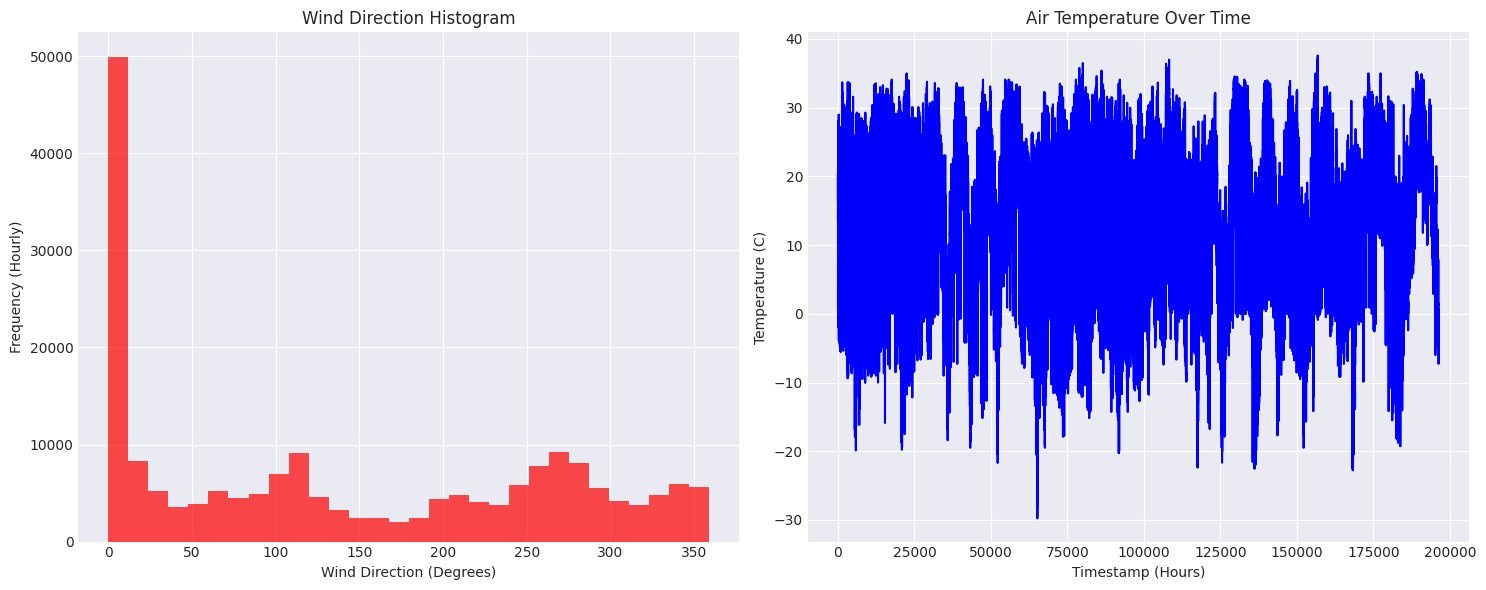

In [76]:
# Data Visualization
print("Beach Weather Sensor data shape:", df_beach.shape)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))  

# Plot air temperature time series
axes[1].plot(df_beach.index, df_beach["Air Temperature"], color='blue')
axes[1].set_xlabel('Timestamp (Hours)')
axes[1].set_ylabel('Temperature (C)')
axes[1].set_title('Air Temperature Over Time')

axes[0].hist(df_beach["Wind Direction"], bins=30, color='red', alpha=0.7)
axes[0].set_xlabel("Wind Direction (Degrees)")
axes[0].set_ylabel('Frequency (Hourly)')
axes[0].set_title('Wind Direction Histogram')

plt.tight_layout()
plt.savefig('output/q1_visualizations.png', dpi = 300, bbox_inches = "tight")
plt.show()

